In [19]:
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc
import PyPDF2
import textract
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from spacy import displacy
import pandas as pd
import plotly.express as px

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\deguz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "jz_skill_patterns.jsonl"

In [21]:
pdf = "DeGuzman_Karl_CV.pdf"

In [22]:
pdfFileObj = open(pdf,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages
count = 0
text = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
text = text.lower()
text = re.sub(r'\d+','',text)
text = re.sub(r'\n', '', text)
text = text.translate(str.maketrans('','',string.punctuation))
text = text.replace('•', '')
text = text.replace('-', '')
text = text.replace('  ', ' ')
text = text.replace('   ', ' ')

In [23]:
pdfFileObj = open(pdf,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages
count = 0
text = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
text = text.lower()
text = re.sub(r'\d+','',text)
text = re.sub(r'\n', '', text)
text = text.translate(str.maketrans('','',string.punctuation))
text = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ", text)
text = text.split()
lm = WordNetLemmatizer()
text = [
        lm.lemmatize(word)
        for word in text
        if not word in set(stopwords.words("english"))
    ]
text = " ".join(text)

In [24]:
text

'karl adrian de guzman deguzmankarladriangmailcom veraneo brgy san sebastian kawit cavite linkedin github kaggle education honor adamson university college engineering san marcelino st ermita metro manila bachelor science computer engineering august current relevant coursework data preparation data cleaning data analytics machine learning deep learning ongoing research using artificial intelligence detecting driving distraction cavite national science high school regional science high school maragondon cavite junior senior high school stem track june april honor work experience cirrolytix data scientist intern rd june august utilized python tableau creating dashboard showing visualization covid online article scraped gdelt designed suicide registry pilot testing joined global hackathon solve challenge related covid pandemic highlighting significant change covid pandemic visualization guided insight prospective user dashboard intended visualize ec onomic proxy nightlights economic activ

In [25]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [26]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset

In [27]:
skills = get_skills(text)
skills = list(dict.fromkeys(skills))

In [28]:
skills

['github',
 'engineering',
 'computer engineering',
 'analytics',
 'machine learning',
 'deep learning',
 'artificial intelligence',
 'python',
 'tableau',
 'visualization',
 'testing',
 'ai',
 'data science',
 'programming language',
 'dart',
 'git',
 'tensorflow',
 'deployment',
 'javascript',
 'bootstrap',
 'django',
 'google',
 'firebase',
 'mobile',
 'flutter',
 'embedded system',
 'jasmine',
 'support',
 'nosql',
 'box']

In [29]:
plt.figure(figsize=(8, 8))



wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
)

wc.generate(text)

<Figure size 800x800 with 0 Axes>

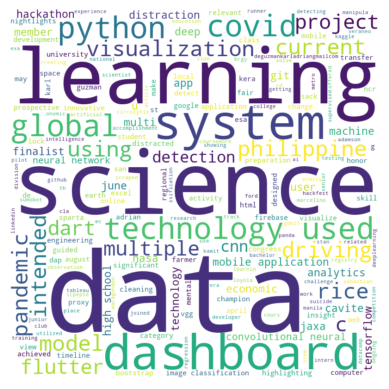

In [30]:
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

In [31]:
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
displacy.render(nlp(text), style="ent", jupyter=True, options=options)

In [32]:
terms = {'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare/Medical':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system','blood'],
         'IT/Telecommunications':['computer','customer','electronics','technician','communication','technology','networks'],
         'Hotel/Restaurants':['staff','cook','hospitality','service','hotel','hospitality'],
         'Travel/Tourism':['staff','cook','hospitality','service','flight attendant','international','local'],
         'Electronics/Electrical':['technician specialist''wirings','pcb','simulation','technician','measurement','circuit',
                                  'maintenance','operational','equipment','ohms','amphere','shortcircuit','schematics','linear','systems'],
         'Customer Service/Call Center':['agents','representative','voice','help desk','online','database','telephone','communications'],
         'Constructions/Civil Works':['design','planning','project','critical thinking','risks','environmental','building','house','highway'],
         'Education/Teaching':['math','science','students','teacher','patience','creativity','communication','organization','multitasking'],
        'Accounting':['cheque','excel','word','Powerpoint','MYOB','cash','wages','taxes','reports','payroll','banking','accountant','Business Management',
                                  'Financial','Credit','debtor']}


In [33]:
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0
it_telecommunications = 0
hotel_restaurants = 0
tourism = 0
electronics = 0
customer_service = 0
construction = 0
education = 0
accounting = 0
scores = []

for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(data)
        
    elif area == 'IT/Telecommunications':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(it_telecommunications)
        
    elif area == 'Hotel/Restaurants':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(hotel_restaurants)
        
    elif area == 'Travel/Tourism':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(tourism)

    elif area == 'Electronics/Electrical':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(electronics)

    elif area == 'Customer Service/Call Center':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(customer_service)
        
    elif area == 'Constructions/Civil Works':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(construction)

    elif area == 'Education/Teaching':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(education)
        
    elif area == 'Accounting':
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    data+=1
        scores.append(accounting)

    else:
        for word in terms[area]:
            for skill in skills:
                if skill == word:
                    healthcare +=1
        scores.append(healthcare)

In [34]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,7
Operations management,0
Supply chain,0
Project management,0
Healthcare/Medical,0
IT/Telecommunications,0
Hotel/Restaurants,0
Travel/Tourism,0
Electronics/Electrical,0
Customer Service/Call Center,0


In [35]:
fig = px.bar(summary, x=summary.index, y=summary.score)
fig.show()